# Import functions for all processing
Put this notebook inside passive_interval_oddball_202412 project folder. The fllowing is the same as main.py at the beginning.

In [13]:
import sys
import warnings
warnings.filterwarnings('ignore')

import gc
import os
import argparse
from datetime import datetime

from modules import Trialization
from modules.ReadResults import read_ops

def combine_session_config_list(session_config_list):
    list_session_data_path = []
    for sc in session_config_list['list_config']:
        list_session_data_path += [
            os.path.join('results', sc['session_folder'], n)
            for n in sc['list_session_name'].keys()]
    list_session_name = [sc['list_session_name'] for sc in session_config_list['list_config']]
    list_session_name = {k: v for d in list_session_name for k, v in d.items()}
    session_config_list['list_session_name'] = list_session_name
    session_config_list['list_session_data_path'] = list_session_data_path
    return session_config_list

# Define the folder name to the sessions you want to process

## Folder structure

This notebook should be SomeWhere/passive_interval_oddball_202412/quick_start.ipynb.

The data should be SomeWhere/passive_interval_oddball_202412/SubjectName/SessionName.

In this example, we use 1 session from the random paradigm, and the session data is SomeWhere/passive_interval_oddball_202412/test/VTYH02_PPC_20250109_3331Random.

## How to set the sessions going into the analysis

Change list_session_name elements in session_config_test to add or exclude sessions. No need to change anything else at this time.

## It works for both single and cross subject analysis

Here, session_config_test is for cross subject analysis, while session_config_list_test specify the info for one subject. If you are running single subject analysis, list_config in session_config_list_test should have only 1 element for that subject.

## Using short long session as example below

In [34]:
session_config_test = {
        'list_session_name' : {
            'VTYH02_PPC_20250214_1451ShortLong' : 'short_long',
            'VTYH02_PPC_20250213_1451ShortLong' : 'short_long',
            'VTYH02_PPC_20250212_1451ShortLong' : 'short_long',
            'VTYH02_PPC_20250211_1451ShortLong' : 'short_long',
            'VTYH02_PPC_20250210_1451ShortLong' : 'short_long',
            'VTYH02_PPC_20250208_1451ShortLong' : 'short_long',
            'VTYH02_PPC_20250207_1451ShortLong' : 'short_long',
            'VTYH02_PPC_20250206_1451ShortLong' : 'short_long',
            },
        'session_folder' : 'pupil',
        'sig_tag' : 'all',
        'force_label' : None,
        }
session_config_list_test = {
    'list_config': [
        session_config_test,
        ],
    'label_names' : {
        '-1':'Exc',
        '1':'Inh_VIP',
        '2':'Inh_SST',
        },
    'subject_name' : 'test',
    'output_filename' : 'test_passive.html'
    }

Read all saved processsed results.

Set other useful variables.

In [35]:
cate_list = [[-1,1,2]]

import matplotlib.pyplot as plt

label_names = {'-1':'Exc', '1':'Inh_VIP', '2':'Inh_SST'}
cate = [-1,1,2]
roi_id = None
norm_mode='none'
cluster_cmap = plt.cm.hsv
standard = 1
oddball = 1
block = 0
mode = 'post'
temp_folder = 'temp_'+session_config_list_test['subject_name']
if not os.path.exists(os.path.join('results', 'temp_'+session_config_list_test['subject_name'])):
    os.makedirs(os.path.join('results', 'temp_'+session_config_list_test['subject_name']))

Run this to get session configurations. There is only 1 session so the list will have only 1 element. The list structure is using for cross session or cross subject settings.

In [36]:
session_config_list = combine_session_config_list(session_config_list_test)
list_ops = read_ops(session_config_list['list_session_data_path'])
print(session_config_list)
print(f'number of sessions: {len(list_ops)}')

{'list_config': [{'list_session_name': {'VTYH02_PPC_20250214_1451ShortLong': 'short_long', 'VTYH02_PPC_20250213_1451ShortLong': 'short_long', 'VTYH02_PPC_20250212_1451ShortLong': 'short_long', 'VTYH02_PPC_20250211_1451ShortLong': 'short_long', 'VTYH02_PPC_20250210_1451ShortLong': 'short_long', 'VTYH02_PPC_20250208_1451ShortLong': 'short_long', 'VTYH02_PPC_20250207_1451ShortLong': 'short_long', 'VTYH02_PPC_20250206_1451ShortLong': 'short_long'}, 'session_folder': 'pupil', 'sig_tag': 'all', 'force_label': None}], 'label_names': {'-1': 'Exc', '1': 'Inh_VIP', '2': 'Inh_SST'}, 'subject_name': 'test', 'output_filename': 'test_passive.html', 'list_session_name': {'VTYH02_PPC_20250214_1451ShortLong': 'short_long', 'VTYH02_PPC_20250213_1451ShortLong': 'short_long', 'VTYH02_PPC_20250212_1451ShortLong': 'short_long', 'VTYH02_PPC_20250211_1451ShortLong': 'short_long', 'VTYH02_PPC_20250210_1451ShortLong': 'short_long', 'VTYH02_PPC_20250208_1451ShortLong': 'short_long', 'VTYH02_PPC_20250207_1451Shor

# Reading data results

Run the following to do trialization if it is not done yet. Otherwise, you can skip this.

In [46]:
#for i in range(len(list_ops)):
#    Trialization.run(list_ops[i])

Now you can read all results for analysis as follows. If you want to smooth the trace, set smooth=True instead.

In [38]:
from modules.ReadResults import read_all
[list_labels, list_masks,list_neural_trials, list_move_offset] = read_all(session_config_list, smooth=False)

Reading subject 1/1


100%|████████████████████████████████████████████| 8/8 [00:02<00:00,  3.18it/s]


# Define utility functions

All the following codes are drawed from utils.py. No need to go through the details.



In [39]:
# rescale voltage recordings.
def rescale(data, upper, lower):
    data = data.copy()
    data = ( data - np.nanmin(data) ) / (np.nanmax(data) - np.nanmin(data))
    data = data * (upper - lower) + lower
    return data

# compute mean and sem for 3d array data.
def get_mean_sem(data, win_baseline=None):
    # compute mean.
    m = np.nanmean(data.reshape(-1, data.shape[-1]), axis=0)
    # compute sem.
    std = np.nanstd(data.reshape(-1, data.shape[-1]), axis=0)
    count = np.nansum(~np.isnan(data.reshape(-1, data.shape[-1])), axis=0)
    s = std / np.sqrt(count)
    return m, s

def plot_mean_sem(ax, t, m, s, c, l=None, a=1.0):
    ax.plot(t, m, color=c, label=l, alpha=a)
    ax.fill_between(t, m - s, m + s, color=c, alpha=0.25, edgecolor='none')
    ax.set_xlim([np.min(t), np.max(t)])

def plot_pupil(ax, nt, cp, c, u, l):
    cp = rescale(cp, u, l)
    ax.plot(nt, cp, color=c)

## Import functions and run alignment

This is the same when initiating a plotter class.

In [40]:
import traceback
import numpy as np
import matplotlib.ticker as mtick
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.signal import savgol_filter

from modules.Alignment import run_get_stim_response
from modeling.clustering import get_mean_sem_cluster
from modeling.clustering import get_cluster_cate
from modeling.decoding import decoding_time_confusion
from modeling.decoding import decoding_time_single
from modeling.decoding import regression_time_frac
from modeling.generative import get_glm_cate
from modeling.quantifications import fit_trf_model

from utils import norm01
from utils import show_resource_usage
from utils import get_norm01_params
from utils import get_odd_stim_prepost_idx
from utils import get_mean_sem_win
from utils import get_mean_sem
from utils import get_neu_trial
from utils import get_frame_idx_from_time
from utils import get_split_idx
from utils import get_expect_interval
from utils import get_block_1st_idx
from utils import get_block_transition_idx
from utils import exclude_odd_stim
from utils import get_temporal_scaling_data
from utils import get_cmap_color
from utils import hide_all_axis
from utils import get_random_rotate_mat_3d
from utils import adjust_layout_isi_example_epoch
from utils import adjust_layout_neu
from utils import adjust_layout_3d_latent
from utils import add_legend
from utils import add_heatmap_colorbar
from utils import utils_basic

n_sess = len(list_neural_trials)
alignment = run_get_stim_response(temp_folder, list_neural_trials, expected='none')
list_stim_labels = alignment['list_stim_labels']
list_odd_idx = [
    get_odd_stim_prepost_idx(sl) for sl in list_stim_labels]
expect = np.nanmin(np.array([get_expect_interval(sl) for sl in list_stim_labels]),axis=0)
list_block_start = [get_block_1st_idx(sl, 3) for sl in list_stim_labels]
bin_win = [450,2550]
bin_num = 2
d_latent = 3

Aligning trials for session 1/8


trials: 100%|███████████████████████████| 1990/1990 [00:00<00:00, 19931.95it/s]


Aligning trials for session 2/8


trials: 100%|███████████████████████████| 1990/1990 [00:00<00:00, 20687.30it/s]


Aligning trials for session 3/8


trials: 100%|███████████████████████████| 1990/1990 [00:00<00:00, 21618.89it/s]


Aligning trials for session 4/8


trials: 100%|███████████████████████████| 1990/1990 [00:00<00:00, 21745.00it/s]


Aligning trials for session 5/8


trials: 100%|███████████████████████████| 1990/1990 [00:00<00:00, 18718.86it/s]


Aligning trials for session 6/8


trials: 100%|███████████████████████████| 1990/1990 [00:00<00:00, 22243.24it/s]


Aligning trials for session 7/8


trials: 100%|███████████████████████████| 1990/1990 [00:00<00:00, 19903.91it/s]


Aligning trials for session 8/8


trials: 100%|███████████████████████████| 1990/1990 [00:00<00:00, 19208.18it/s]


In [41]:
[_, [neu_seq_0, _, stim_seq_0, camera_pupil_0], _, _] = get_neu_trial(
    alignment, list_labels, list_stim_labels,
    trial_param=[[2,3,4,5], [0], None, None, [0], [0]],
    cate=cate, roi_id=None)
[_, [neu_seq_1, _, stim_seq_1, camera_pupil_1], _, _] = get_neu_trial(
    alignment, list_labels, list_stim_labels,
    trial_param=[[2,3,4,5], [1], None, None, [0], [0]],
    cate=cate, roi_id=None)
c_idx = stim_seq_0.shape[0]//2
print('shape of pupil data during short isi: {}'.format(camera_pupil_0.shape))
print('shape of pupil data during long isi: {}'.format(camera_pupil_1.shape))

win_eval = [-2500, 2000]
l_idx, r_idx = get_frame_idx_from_time(alignment['neu_time'], 0, win_eval[0], win_eval[1])
neu_seq_win_0 = neu_seq_0[:,l_idx:r_idx]
neu_seq_win_1 = neu_seq_1[:,l_idx:r_idx]
neu_time_win = alignment['neu_time'][l_idx:r_idx]
print('shape of neural data within the window (short block): {}'.format(neu_seq_win_0.shape))
print('shape of neural data within the window (long block): {}'.format(neu_seq_win_1.shape))

shape of pupil data during short isi: (600,)
shape of pupil data during long isi: (600,)
shape of neural data within the window (short block): (886, 134)
shape of neural data within the window (long block): (886, 134)


# Pupil alignment

Now plot the same trial averaged but for pupil trace.

Text(0, 0.5, 'pupil area')

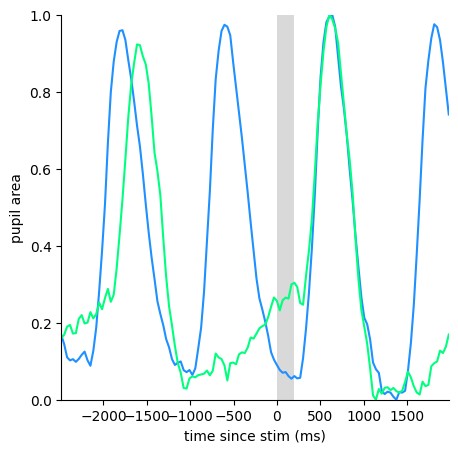

In [42]:
color0 = 'dimgrey'
color1 = 'dodgerblue'
color2 = 'springgreen'

cp_0 = camera_pupil_0[l_idx:r_idx]
cp_1 = camera_pupil_1[l_idx:r_idx]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.fill_between(
    stim_seq_0[int(stim_seq_0.shape[0]/2),:],
    0, 1,
    color=color0, edgecolor='none', alpha=0.25, step='mid')
plot_pupil(ax, neu_time_win, cp_0, color1, 0, 1)
plot_pupil(ax, neu_time_win, cp_1, color2, 0, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([neu_time_win[0], neu_time_win[-1]])
ax.set_ylim([0, 1])
ax.set_xlabel('time since stim (ms)')
ax.set_ylabel('pupil area')

Now plot the same trial averaged pupil trace but during block transition. Instead of accessing trials with trial_param, we use trial_idx and compute the index beforehand.

In [43]:
trials_around = 40
# get transition trials indice.
list_trans_0to1 = [get_block_transition_idx(sl[:,3], trials_around)[0] for sl in list_stim_labels]
list_trans_1to0 = [get_block_transition_idx(sl[:,3], trials_around)[1] for sl in list_stim_labels]
list_trans_0to1 = [np.nansum(ti, axis=0).astype('bool') for ti in list_trans_0to1]
list_trans_1to0 = [np.nansum(ti, axis=0).astype('bool') for ti in list_trans_1to0]

In [44]:
xlim = [-7500, 7000]
l_idx, r_idx = get_frame_idx_from_time(alignment['neu_time'], 0, xlim[0], xlim[1])
# collect data.
[_, [_, _, stim_seq_0to1, camera_pupil_0to1], _, _] = get_neu_trial(
    alignment, list_labels, list_stim_labels,
    trial_idx=[l[1] for l in list_block_start],
    cate=cate, roi_id=None)
[_, [_, _, stim_seq_1to0, camera_pupil_1to0], _, _] = get_neu_trial(
    alignment, list_labels, list_stim_labels,
    trial_idx=[l[0] for l in list_block_start],
    cate=cate, roi_id=None)

neu_time = alignment['neu_time'][l_idx:r_idx]
camera_pupil_0to1 = camera_pupil_0to1[l_idx:r_idx]
camera_pupil_1to0 = camera_pupil_1to0[l_idx:r_idx]
print(f'shape of timestamp: {neu_time.shape}')
print(f'shape of pupil data during short to long transition: {camera_pupil_0to1.shape}')
print(f'shape of pupil data during long to short transition: {camera_pupil_1to0.shape}')

shape of timestamp: (432,)
shape of pupil data during short to long transition: (432,)
shape of pupil data during long to short transition: (432,)


Text(0.5, 1.0, 'L→S adaptation')

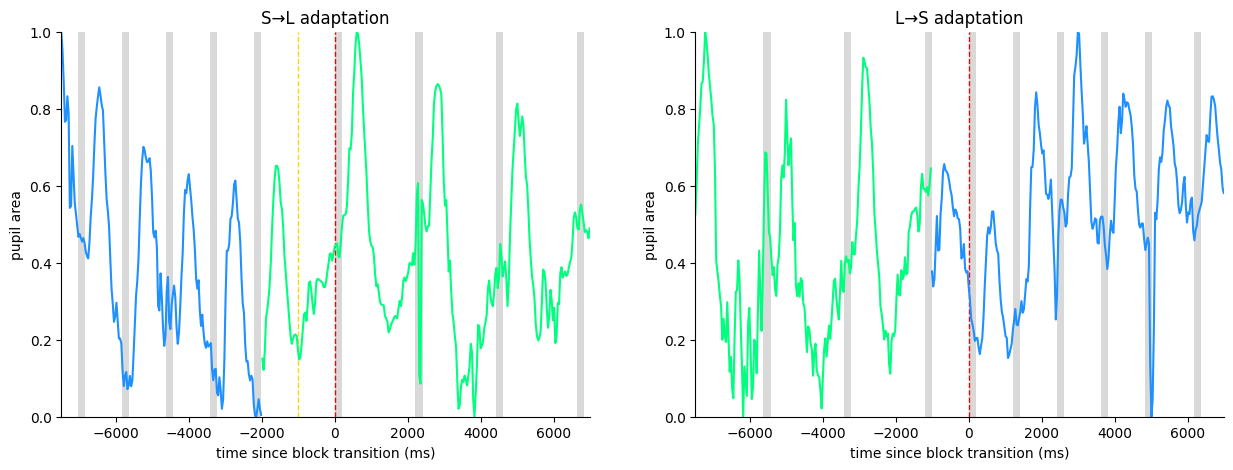

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot stimulus.
for si in range(stim_seq_0to1.shape[0]):
    axs[0].fill_between(
        stim_seq_0to1[si,:],
        0, 1,
        color=color0, edgecolor='none', alpha=0.25, step='mid')
    axs[1].fill_between(
        stim_seq_1to0[si,:],
        0, 1,
        color=color0, edgecolor='none', alpha=0.25, step='mid')
axs[0].axvline(-expect[0], color='gold', lw=1, linestyle='--')
axs[0].axvline(0, color='red', lw=1, linestyle='--')
axs[1].axvline(0, color='red', lw=1, linestyle='--')

z_idx_0 = get_frame_idx_from_time(neu_time, 0, stim_seq_1to0[c_idx-1,1], 0)[0]
z_idx_1 = get_frame_idx_from_time(neu_time, 0, stim_seq_0to1[c_idx-1,1], 0)[0]

plot_pupil(axs[0], neu_time[:z_idx_1], camera_pupil_0to1[:z_idx_1], color1, 0, 1)
plot_pupil(axs[0], neu_time[z_idx_1:], camera_pupil_0to1[z_idx_1:], color2, 0, 1)
plot_pupil(axs[1], neu_time[:z_idx_0], camera_pupil_1to0[:z_idx_0], color2, 0, 1)
plot_pupil(axs[1], neu_time[z_idx_0:], camera_pupil_1to0[z_idx_0:], color1, 0, 1)

for ai in range(2):
    axs[ai].spines['right'].set_visible(False)
    axs[ai].spines['top'].set_visible(False)
    axs[ai].set_xlim([neu_time[0], neu_time[-1]])
    axs[ai].set_ylim([0, 1])
    axs[ai].set_xlabel('time since block transition (ms)')
    axs[ai].set_ylabel('pupil area')
axs[0].set_title('S\u2192L adaptation')
axs[1].set_title('L\u2192S adaptation')